PSNR values: [np.float64(54.98453416714745), np.float64(38.70424634521665), np.float64(55.45002759914812), 100]


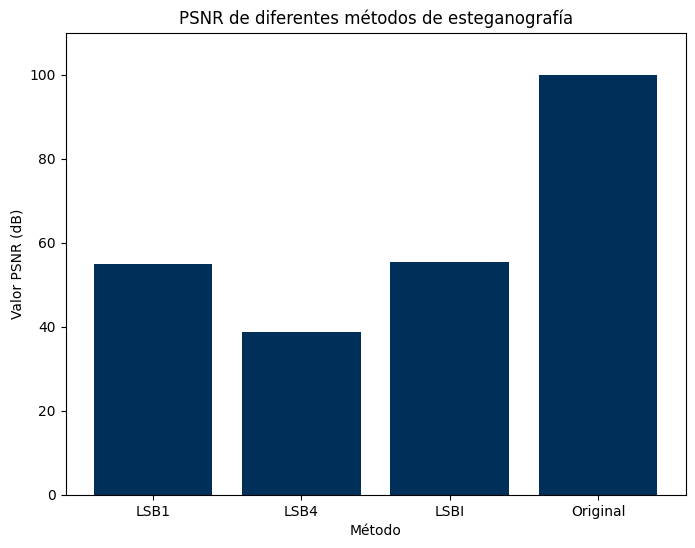

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_psnr(original, stego):
    mse = np.mean((original - stego) ** 2)
    if mse == 0:  # No differences (original vs original case)
        return float('inf')  # Return infinity when there's no difference
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Cargar imagen original
original_image = cv2.imread('lado.bmp')

if original_image is None:
    print("Error: No se pudo cargar 'porter_image.bmp'.")

# Lista de archivos steganogram para evaluar
steganograms = ['ladoLSB1.bmp', 'ladoLSB4.bmp', 'ladoLSBI.bmp', 'lado.bmp']

# Almacenar los resultados PSNR
psnr_values = []
methods = ['LSB1', 'LSB4', 'LSBI', 'Original']

for steganogram in steganograms:
    stego_image = cv2.imread(steganogram)

    if stego_image is None:
        print(f"Error: No se pudo cargar '{steganogram}'.")
        continue
    
    psnr_value = calculate_psnr(original_image, stego_image)
    
    # Manejar el caso de comparación original con original
    if np.isinf(psnr_value):
        psnr_value = 100  # Asignar un valor simbólico para representar PSNR infinito
    
    psnr_values.append(psnr_value)

print("PSNR values:", psnr_values)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(methods, psnr_values, color='#002f59')
plt.title('PSNR de diferentes métodos de esteganografía')
plt.xlabel('Método')
plt.ylabel('Valor PSNR (dB)')
plt.ylim(0, max(psnr_values) + 10)

# Mostrar gráfico
plt.show()


PSNR values: [np.float64(53.08786740287813), np.float64(39.76311829271999), np.float64(53.09176403252636), 100]


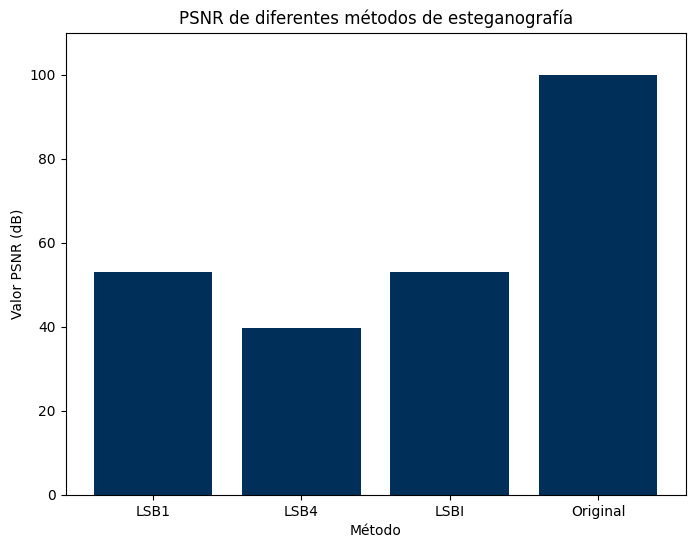

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_psnr(original, stego):
    mse = np.mean((original - stego) ** 2)
    if mse == 0:  # No differences (original vs original case)
        return float('inf')  # Return infinity when there's no difference
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Cargar imagen original
original_image = cv2.imread('porter_img.bmp')

if original_image is None:
    print("Error: No se pudo cargar 'porter_image.bmp'.")

# Lista de archivos steganogram para evaluar
steganograms = ['steganogram_lsb1.bmp', 'steganogram_lsb4.bmp', 'steganogram_lsbi.bmp', 'porter_img.bmp']

# Almacenar los resultados PSNR
psnr_values = []
methods = ['LSB1', 'LSB4', 'LSBI', 'Original']

for steganogram in steganograms:
    stego_image = cv2.imread(steganogram)

    if stego_image is None:
        print(f"Error: No se pudo cargar '{steganogram}'.")
        continue
    
    psnr_value = calculate_psnr(original_image, stego_image)
    
    # Manejar el caso de comparación original con original
    if np.isinf(psnr_value):
        psnr_value = 100  # Asignar un valor simbólico para representar PSNR infinito
    
    psnr_values.append(psnr_value)

print("PSNR values:", psnr_values)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(methods, psnr_values, color='#002f59')
plt.title('PSNR de diferentes métodos de esteganografía')
plt.xlabel('Método')
plt.ylabel('Valor PSNR (dB)')
plt.ylim(0, max(psnr_values) + 10)

# Mostrar gráfico
plt.show()


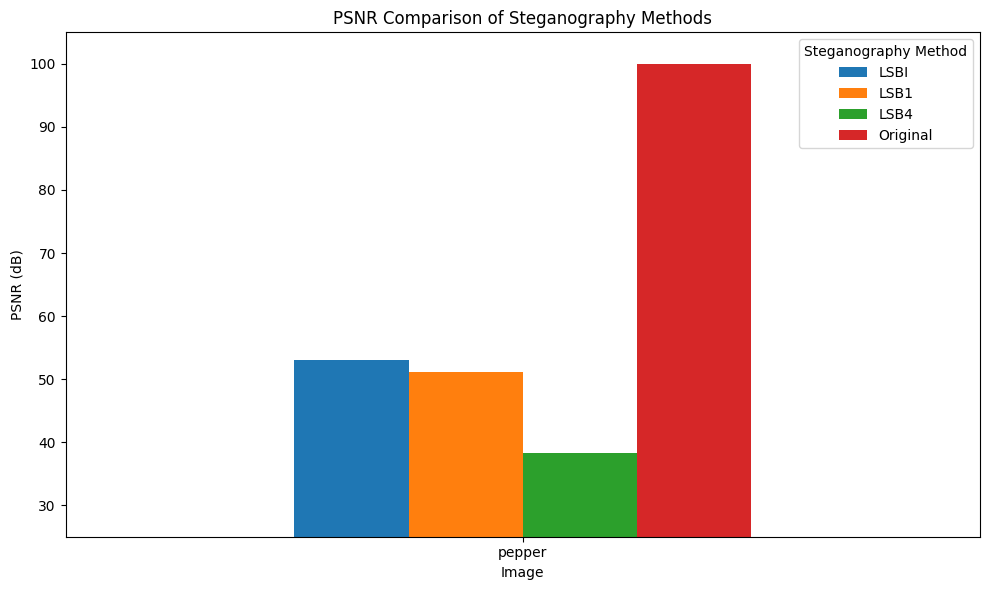

              pepper
LSBI       52.978277
LSB1       51.167714
LSB4       38.339161
Original  100.000000


In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_psnr(original, stego):
    mse = np.mean((original - stego) ** 2)
    if mse == 0:  # No differences (original vs original case)
        return float('inf')  # Return infinity when there's no difference
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Images and steganography methods
images = ['pepper']
methods = ['LSBI','LSB1', 'LSB4', 'Original']

# Prepare dictionary to store PSNR values
psnr_values = {image: [] for image in images}

# Iterate over each image
for image in images:
    # Load the original image
    original_image = cv2.imread(f'{image}.bmp')
    
    if original_image is None:
        print(f"Error: Could not load {image}.bmp")
        continue

    # List of steganogram files corresponding to each method
    steganograms = [f'{image}_long_lsbi.bmp', f'{image}_long_lsb1.bmp', f'{image}_long_lsb4.bmp', f'{image}.bmp']

    # Calculate PSNR for each method
    for steganogram in steganograms:
        stego_image = cv2.imread(steganogram)
        
        if stego_image is None:
            print(f"Error: Could not load {steganogram}")
            psnr_values[image].append(np.nan)
            continue

        psnr_value = calculate_psnr(original_image, stego_image)
        
        # Handle the case of comparing original with original
        if np.isinf(psnr_value):
            psnr_value = 100  # Assign a symbolic value for PSNR infinity
        
        psnr_values[image].append(psnr_value)

# Convert PSNR values into a DataFrame for easier plotting
df_psnr = pd.DataFrame(psnr_values, index=methods)

# Plot the PSNR values in a barplot
df_psnr.T.plot(kind='bar', figsize=(10, 6), ylim=(25, 105))
plt.title('PSNR Comparison of Steganography Methods')
plt.ylabel('PSNR (dB)')
plt.xlabel('Image')
plt.xticks(rotation=0)
plt.legend(title='Steganography Method')
plt.tight_layout()
plt.show()

# Display the table of PSNR values
print(df_psnr)
